# s Grids

In [15]:
# imports
from importlib import reload
import numpy as np

import matplotlib.pyplot as plt
import matplotlib

from zdm import iteration as it
from zdm import errors_misc_functions as err

from zdm import io
from zdm.craco import loading

# Load

In [3]:
# imports
############## Load up ##############
input_dict=io.process_jfile('../Analysis/Cubes/craco_H0_Emax_cube.json')

# Deconstruct the input_dict
state_dict, cube_dict, vparam_dict = it.parse_input_dict(input_dict)

## Grid

In [11]:
survey,grid = loading.survey_and_grid(
    state_dict=state_dict,
    survey_name='CRAFT_CRACO_MC_alpha1_gamma_1000', NFRB=1000)

Loading survey: CRAFT_CRACO_MC_alpha1_gamma_1000
FRB survey succeffully initialised with  1000  FRBs
Initialised grid


# $s$, DM

## Test

In [19]:
NSNR=51
snrs=np.logspace(0,2,NSNR)

In [20]:
reload(err)
psnrs,dmpsnrs=err.get_sc_grid(grid, NSNR, snrs)

In [21]:
dmpsnrs.shape

(50, 1400)

In [29]:
dmvals = grid.dmvals

### Plot

In [22]:
cmx = plt.get_cmap('cubehelix')

### Cut on DMmax

In [43]:
DMmax = 2000.
iymax=np.where(dmvals > DMmax)[0]
if len(iymax)>0:
    dmvals=dmvals[:iymax[0]]
    dmpsnrs=dmpsnrs[:,:iymax[0]]
    ndm=dmvals.size

In [44]:
### Normalize
xnorm=np.sum(dmpsnrs)
dmpsnrs /= xnorm
#if Aconts:
#    alevels /= xnorm

In [46]:
aspect=dmpsnrs.shape[0]/float(dmpsnrs.shape[1])

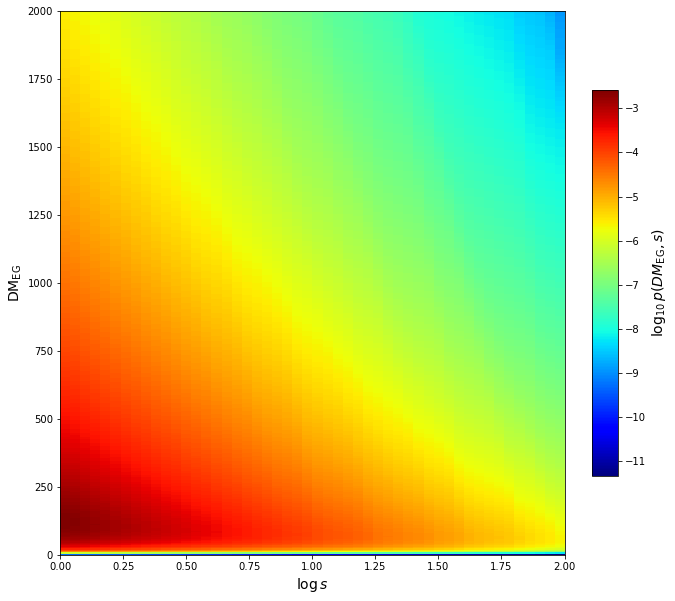

In [60]:
plt.figure(figsize=(10,10))
im=plt.imshow(np.log10(dmpsnrs.T),cmap='jet',origin='lower', 
                  interpolation='None',
                  extent=[0., 2, 0, 2000.],
                  aspect='auto')
# Color bar
cbar=plt.colorbar(im,fraction=0.046, shrink=1.2,aspect=15,pad=0.05)
label='$\\log_{10} \, p(DM_{\\rm EG},s)$'
cbar.set_label(label,fontsize=14)
#
# Contours
#
#
ax = plt.gca()
ax.set_xlabel(r'$\log s$', fontsize=14)
ax.set_ylabel(r'DM$_{\rm EG}$', fontsize=14)
plt.show()    

In [49]:
dmpsnrs.shape

(50, 400)

In [61]:
np.log10(1.584)

0.19975517725347472

# $s, z$

In [ ]:
reload(err)
psnrs,psz=err.get_sc_grid(grid, NSNR, snrs, calc_psz=True)

> /data/Projects/FRB_Software/zdm/zdm/errors_misc_functions.py(44)get_sc_grid()
     42     grid.b_fractions=None
     43 
---> 44     for i,s in enumerate(snrs):
     45 
     46         grid.thresholds=backup1*s



ipdb>  i


50


ipdb>  cpgrid.shape


(51, 500)


ipdb>  psnrs.shape


(50,)


ipdb>  cpsnrs.shape


(51,)


ipdb>  calc_psz


True


ipdb>                  cpgrid[i,:]=np.sum(rates,axis=1)


In [ ]:
psz.shape

In [67]:
NSNR

51

In [68]:
snrs.size

51